In [2]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)

print("Added to path:", PROJECT_ROOT)

import torch
from models.fine_net import FineDepthNet

model = FineDepthNet()

rgb = torch.randn(2, 3, 224, 224)
coarse = torch.randn(2, 1, 224, 224)

out = model(rgb, coarse)

print("Output shape:", out.shape)


Added to path: /home/ashutosh24135/eigen-monocular-depth
Output shape: torch.Size([2, 1, 224, 224])


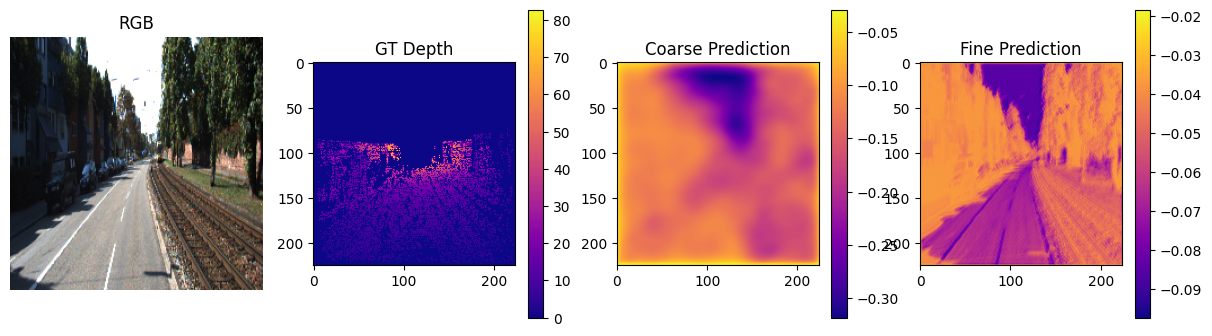

In [3]:
import torch
import matplotlib.pyplot as plt
from models.dataset import Dataset
from models.coarse_net import CoarseDepthNet
from models.fine_net import FineDepthNet

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

dataset = Dataset("../data/")
sample = dataset[0]

img = sample["image"].unsqueeze(0).to(DEVICE)

coarse = CoarseDepthNet().to(DEVICE)
coarse.load_state_dict(torch.load("../checkpoints/coarse_epoch_10.pth"))
coarse.eval()

fine = FineDepthNet().to(DEVICE)
fine.load_state_dict(torch.load("../checkpoints/fine_epoch_10.pth"))
fine.eval()

with torch.no_grad():
    coarse_pred = coarse(img)
    fine_pred = fine(img, coarse_pred)

plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
plt.imshow(sample["image"].permute(1,2,0))
plt.title("RGB")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(sample["depth"].squeeze(), cmap="plasma")
plt.title("GT Depth")
plt.colorbar()

plt.subplot(1,4,3)
plt.imshow(coarse_pred.squeeze().cpu(), cmap="plasma")
plt.title("Coarse Prediction")
plt.colorbar()

plt.subplot(1,4,4)
plt.imshow(fine_pred.squeeze().cpu(), cmap="plasma")
plt.title("Fine Prediction")
plt.colorbar()

plt.show()
